Задание №1. Пишем функцию по скрейпингу

In [9]:
! pip install requests beautifulsoup4
# импортируемся для запросов
import requests
# для парсинга HTML
from bs4 import BeautifulSoup

In [12]:
def scrape_text_from_url(url, tag, class_=None):
    response = requests.get(url)  # HTML запрос
    if response.status_code == 200:  # возвр 200, если запрос успешный
        soup = BeautifulSoup(response.content, 'html.parser')  # парсим содержание странички с помощью BeautifulSoup
        paragraphs = soup.find_all(tag, class_=class_)  # ищем теги и классы на основании аргументов функции
        text = ""  # создаем строчную переменную text
        for p in paragraphs:  # перебираем paragraphs
            text += p.get_text() + "\n"  # извлекаем текстовые данные и кладем их в text
        return text.strip()  # возвращаем текст, удаляя лишние пробелы и переносы строк
    else:
        print(f"Ошибка: Статус-код {response.status_code}")  # выводим статус-код и сообщение об ошибке если что-то пошло не так
        return None  # возвращаем None в случае ошибки

In [13]:
# ПРОВЕРКА на Ноаме Хомски
scrape_text_from_url('https://en.wikipedia.org/wiki/Chomsky_hierarchy', 'p')

'The Chomsky hierarchy in the fields of formal language theory, computer science, and linguistics, is a containment hierarchy of classes of formal grammars. A formal grammar describes how to form strings from a language\'s vocabulary (or alphabet) that are valid according to the language\'s syntax. The linguist Noam Chomsky theorized that four different classes of formal grammars existed that could generate increasingly complex languages. Each class can also completely generate the language of all inferior classes (set inclusive).\n\nThe general idea of a hierarchy of grammars was first described by Noam Chomsky in "Three models for the description of language" during the formalization of transformational-generative grammar (TGG).[1] Marcel-Paul Schützenberger also played a role in the development of the theory of formal languages; the paper "The algebraic theory of context free languages"[2] describes the modern hierarchy, including context-free grammars.[3]\n\nIndependently, alongsid

In [14]:
# ПРОВЕРКА на рецензии
scrape_text_from_url('https://www.rottentomatoes.com/m/civil_war_2024/reviews', 'p', 'review-text')

"Civil War is not a film about why extreme division happens; it’s about the personal impact of division at its worst.\nA staggering and frequently brilliant film looking at a hopefully just fictionalized version of America destroying itself from within.\nGarland seems poised to be make political points, to show how our current political dysfunction could lead to something far worse… but he never follows through.\nThis violent tale of anaesthetised reporters is just a war yarn with a twist.\nThis easy digital fakeness is there to get the audience used to it...\nRather than glorifying war, the film is artful and meditative, making us feel the pointlessness of this violence, how unglamorous and exhausting and unheroic it is.\nIt’s not always subtle, and in some cases it’s even frustrating with some of its narrative decisions, but nothing can deny its uncanny ability to leave you horrified by how war, civil or otherwise, can be truly monstrous from any humanist angle.\nThe film isn’t very 

Задание №2. Пишем функцию сентимент-анализа.

In [16]:
# подготовка ворд листов
!wget https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/neg.txt
!wget https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/pos.txt

with open('neg.txt') as f:
  neg = f.read()

with open('pos.txt') as f:
  pos = f.read()

--2024-12-19 12:46:54--  https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/neg.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44759 (44K) [text/plain]
Saving to: ‘neg.txt.1’

neg.txt.1           100%[===================>]  43.71K  --.-KB/s    in 0.05s   

2024-12-19 12:46:55 (811 KB/s) - ‘neg.txt.1’ saved [44759/44759]

--2024-12-19 12:46:55--  https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/pos.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19093 (19K) [text/plain]
Savin

In [17]:
pos_list = pos.split('\n')  # делим строку по символу новой строки
neg_list = neg.split('\n')

pos_list[:10]  # Выводим первые 10 слов из списка положительных слов

['a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation']

In [18]:
'''
Допишите функцию для анализа тональности
Функция принимает на вход 3 аргумента:
  - переменную text с текстов для анализа
  - 2 списка со словами для анализа тональности: positive_words и negative_words
'''

def analyze_sentiment(text, positive_words, negative_words):
    ### Ваш код здесь: приведите текст к нижнему регистру и поделите его на слова ###
    text = text.lower()  # Приводим текст к нижнему регистру
    words = text.split()  # Разделяем текст на слова

    ### По желанию: удалить стоп-слова и знаки препинания; использовать NLP-библиотеки для токенизации ###
    # Пример: удаление знаков препинания
    import string
    words = [word.strip(string.punctuation) for word in words]

    ### Важно: запишите результат в переменную words ###

    # Считаем скор тональности: количество пересечений между списками words и положительными / отрицательными словами
    positive_count = sum(1 for word in words if word in positive_words)
    negative_count = sum(1 for word in words if word in negative_words)

    ### Ваш код здесь: если положительный скор больше отрицательного, возвращаем строчку 'positive' ###
    if positive_count > negative_count:
        return 'positive'

    ### Ваш код здесь: если отрицательный скор больше положительного, возвращаем строчку 'negative' ###
    elif negative_count > positive_count:
        return 'negative'

    ### else нейтральные ###
    else:
        return 'neutral'

In [19]:
# пример 1
analyze_sentiment('This sample text is awesome!', pos_list, neg_list)

'positive'

In [20]:
# пример 2
analyze_sentiment('I hate this sample text.', pos_list, neg_list)

'negative'

In [21]:
# пример 3
analyze_sentiment('We love and hate this sample text at the same time!', pos_list, neg_list)

'neutral'

Задание №3. Функция вывода сентимент-скоров.

In [27]:
def analyze(positive_words, negative_words, url, tag, class_=None):
  scraped_text = scrape_text_from_url(url, tag, class_) # для скрейпинга
  sentences = scraped_text.split('.') # сегментируем по точам
  sentiments = [] # пустой список для скоров
  for sentence in sentences:# перебираем
    score = analyze_sentiment(sentence, positive_words, negative_words) #полуаем скор
    sentiments.append(score) # заносим скор в изначально пустой список
  return sentiments # возвращаем скоры в списке

In [29]:
# пример 1

analyze(url='https://en.wikipedia.org/wiki/Chomsky_hierarchy', tag='p', positive_words=pos, negative_words=neg)[:10]

['neutral',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative']

In [31]:
# пример 2
analyze(url='https://www.rottentomatoes.com/m/civil_war_2024/reviews', tag='p', class_='review-text', positive_words=pos, negative_words=neg)[:10]

['negative',
 'neutral',
 'negative',
 'negative',
 'negative',
 'neutral',
 'neutral',
 'negative',
 'negative',
 'positive']

Задание №4. Визуализация результатов

In [32]:
from collections import Counter

sample1 = Counter(analyze(url='https://en.wikipedia.org/wiki/Chomsky_hierarchy', tag='p', positive_words=pos, negative_words=neg))
sample2 = Counter(analyze(url='https://www.rottentomatoes.com/m/civil_war_2024/reviews', tag='p', class_='review-text', positive_words=pos, negative_words=neg))

sample1

Counter({'neutral': 7, 'negative': 33, 'positive': 4})

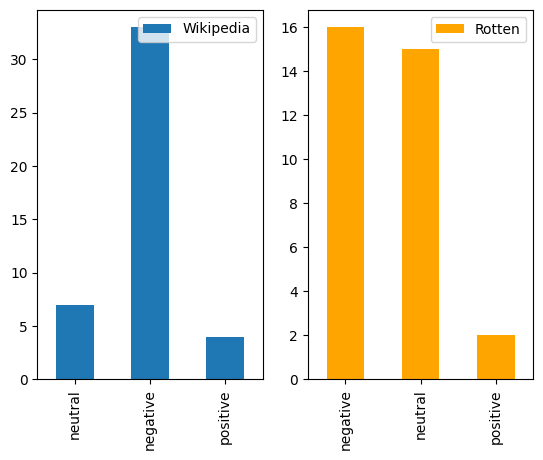

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.DataFrame.from_dict(sample1, orient='index', columns=['Wikipedia'])
df2 = pd.DataFrame.from_dict(sample2, orient='index', columns=['Rotten'])

fig, ax = plt.subplots(ncols=2)

ax[0] = df1.plot.bar(ax=ax[0])
ax[1] = df2.plot.bar(ax=ax[1], color='orange')

Задание №5. Рефракторинг и оптимизация (all in one)

--2024-12-19 14:03:59--  https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/neg.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44759 (44K) [text/plain]
Saving to: ‘neg.txt.2’

neg.txt.2           100%[===================>]  43.71K  --.-KB/s    in 0.05s   

2024-12-19 14:04:00 (813 KB/s) - ‘neg.txt.2’ saved [44759/44759]

--2024-12-19 14:04:00--  https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/pos.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19093 (19K) [text/plain]
Savin

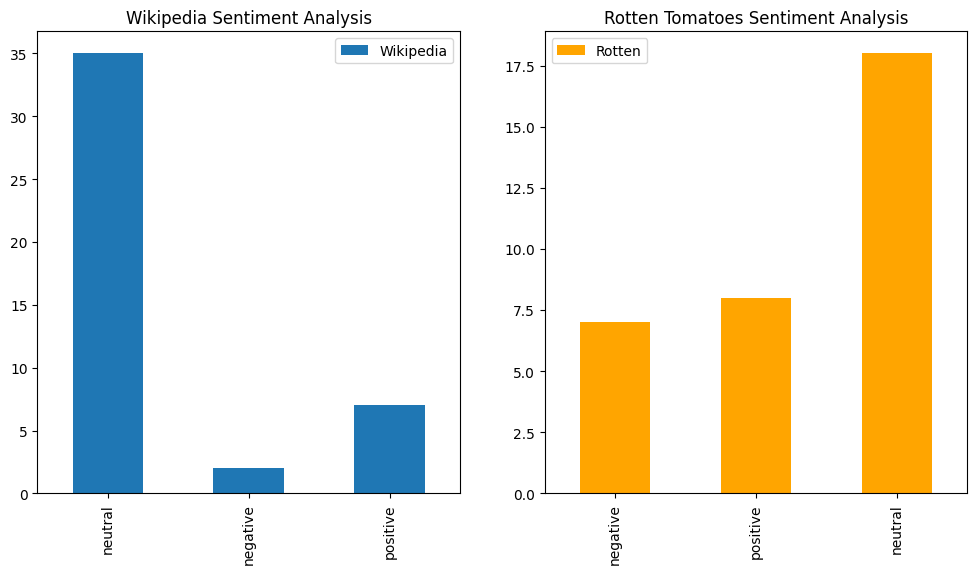

In [37]:
#установка и импорт всех необходимых библиотек
!pip install requests beautifulsoup4
import requests
from bs4 import BeautifulSoup
import string
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# функция скрейпинга
def scrape_text_from_url(url, tag, class_=None):
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        paragraphs = soup.find_all(tag, class_=class_)
        text = ''.join(p.get_text() for p in paragraphs)  # через генератор для компактности
        return text.strip()
    else:
        print(f"Ошибка: Статус-код {response.status_code}")
        return None

# функция сентимент анализа
def analyze_sentiment(text, positive_words, negative_words):
    text = text.lower()
    words = [word.strip(string.punctuation) for word in text.split()]
    positive_count = sum(1 for word in words if word in positive_words)
    negative_count = sum(1 for word in words if word in negative_words)

    if positive_count > negative_count:
        return 'positive'
    elif negative_count > positive_count:
        return 'negative'
    else:
        return 'neutral'

# с-анализ для веб страницы
def analyze(positive_words, negative_words, url, tag, class_=None):
    scraped_text = scrape_text_from_url(url, tag, class_)
    if not scraped_text:
        return []

    sentences = scraped_text.split('.')
    sentiments = [analyze_sentiment(sentence, positive_words, negative_words) for sentence in sentences]

    print(f"Анализ текста с {url}:")
    print(f"Результаты анализа: {sentiments}")

    return sentiments # скоры выводим

# ворд листы нег и поз
!wget https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/neg.txt
!wget https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/pos.txt

with open('neg.txt') as f:
    neg = f.read().splitlines()  # оптимизируем разделение

with open('pos.txt') as f:
    pos = f.read().splitlines()

print("Первые 10 положительных слов:", pos[:10]) # 10 первых из списка положительных слов

# fанализ
sample1 = Counter(analyze(url='https://en.wikipedia.org/wiki/Chomsky_hierarchy', tag='p', positive_words=pos, negative_words=neg))
sample2 = Counter(analyze(url='https://www.rottentomatoes.com/m/civil_war_2024/reviews', tag='p', class_='review-text', positive_words=pos, negative_words=neg))

# визуализация
df1 = pd.DataFrame.from_dict(sample1, orient='index', columns=['Wikipedia'])
df2 = pd.DataFrame.from_dict(sample2, orient='index', columns=['Rotten'])

fig, ax = plt.subplots(ncols=2, figsize=(12, 6))

df1.plot.bar(ax=ax[0], title="Wikipedia Sentiment Analysis")
df2.plot.bar(ax=ax[1], color='orange', title="Rotten Tomatoes Sentiment Analysis")

plt.show()